# Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Preparing Training and Testing Dataset

In [9]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

In [10]:
X.shape

(768, 8)

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Data Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def visualize(X,col_name):
    fig , ax =plt.subplots(1 , 2 , figsize = (12 , 5))
    sns.histplot(data = X, x = col_name , ax=ax[0])
    sns.boxplot(data = X, y = col_name , ax= ax[1])

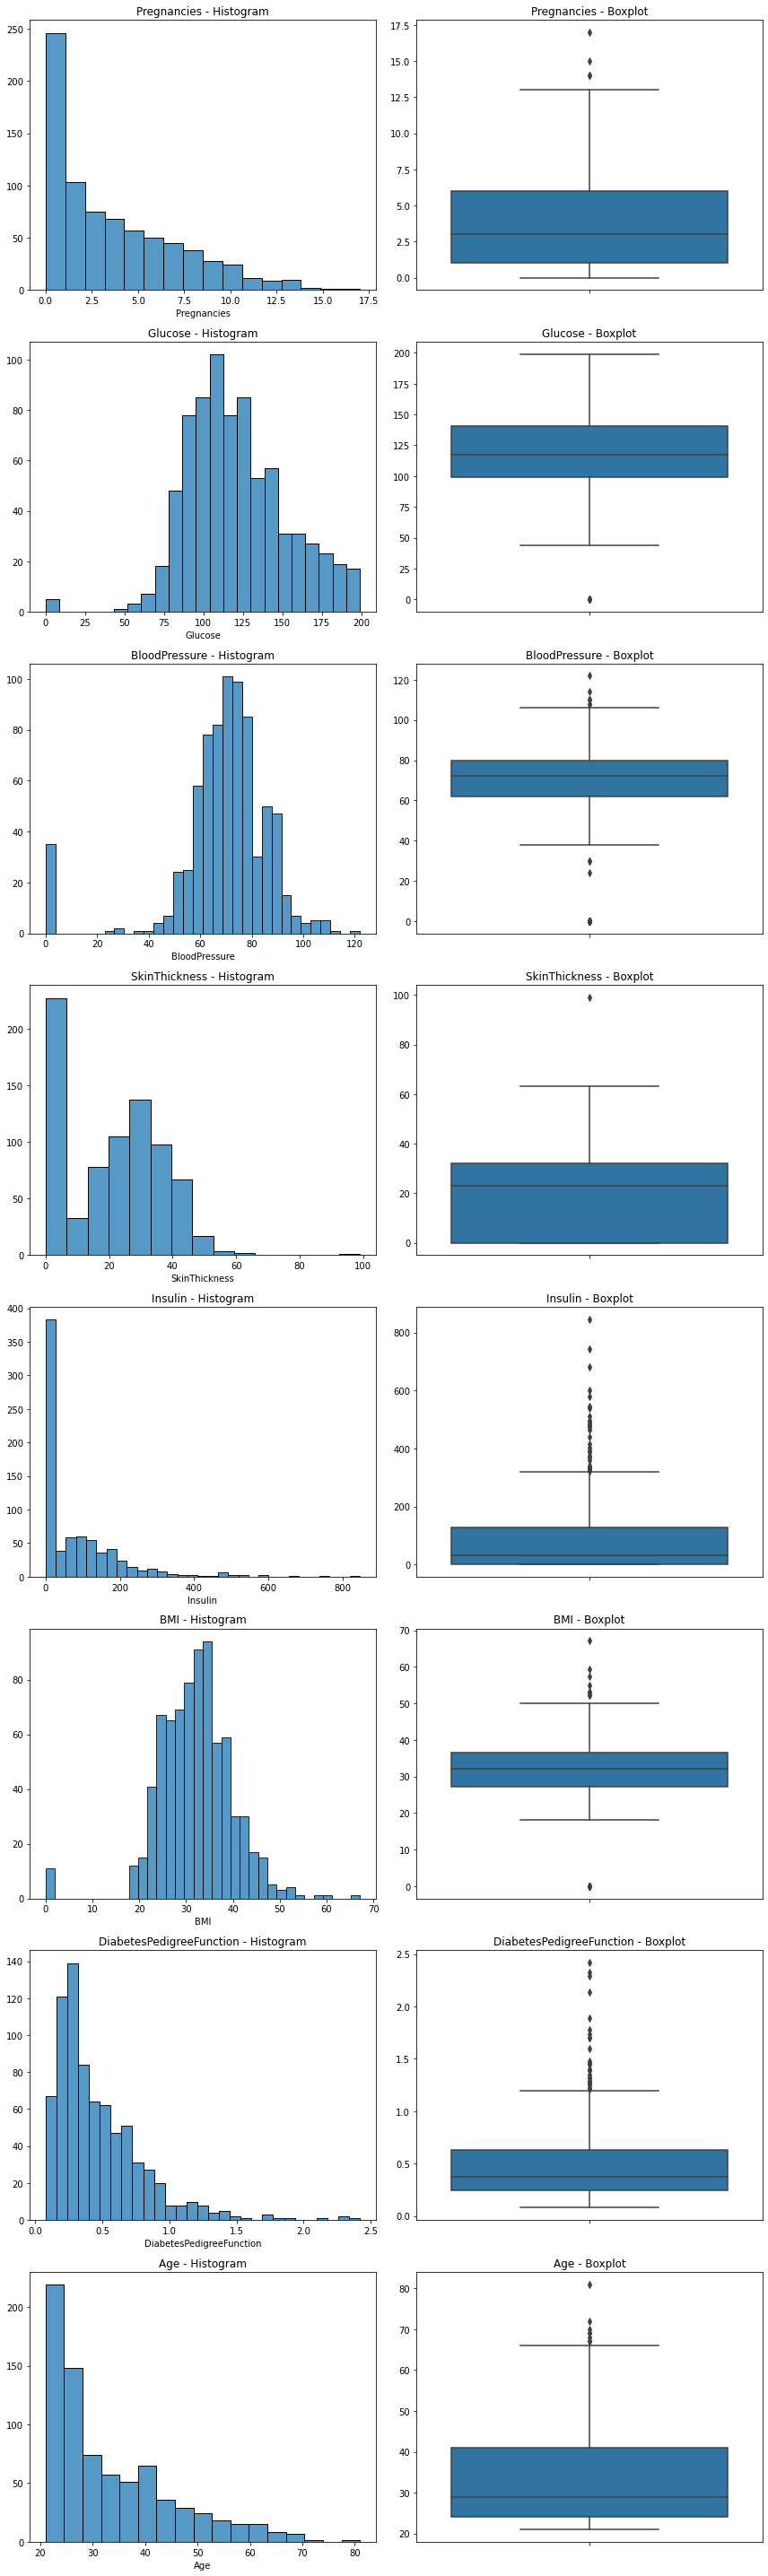

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_all_columns(X):
    num_cols = X.shape[1]
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5*num_cols))
    
    for i, col_name in enumerate(X.columns):
        sns.histplot(data=X, x=col_name, ax=axes[i, 0])
        sns.boxplot(data=X, y=col_name, ax=axes[i, 1])
        axes[i, 0].set_title(f'{col_name} - Histogram')
        axes[i, 1].set_title(f'{col_name} - Boxplot')
        axes[i, 0].set_ylabel('')
        axes[i, 1].set_ylabel('')
    
    plt.tight_layout()

# Example usage
visualize_all_columns(X)
plt.show()

# Finding IQR

In [17]:
def calculate_iqr(X):
    iqr_values = {}
    limits = {}
    for column in X.columns:
        q1 = X[column].quantile(0.25)
        q3 = X[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        
        iqr_values[column] = iqr
        
        limits[column] = {'lower': lower_limit, 'upper': upper_limit}
        
    return iqr_values , limits

# Calulate Upper Limit and Lower Limit

In [18]:
iqr_values, limits = calculate_iqr(X)

for column, iqr in iqr_values.items():
    print(f"IQR for column '{column}': {iqr}")

for column, values in limits.items():
    print(f"Column '{column}': Lower Limit = {values['lower']}, Upper Limit = {values['upper']}")

IQR for column 'Pregnancies': 5.0
IQR for column 'Glucose': 41.25
IQR for column 'BloodPressure': 18.0
IQR for column 'SkinThickness': 32.0
IQR for column 'Insulin': 127.25
IQR for column 'BMI': 9.3
IQR for column 'DiabetesPedigreeFunction': 0.38249999999999995
IQR for column 'Age': 17.0
Column 'Pregnancies': Lower Limit = -6.5, Upper Limit = 13.5
Column 'Glucose': Lower Limit = 37.125, Upper Limit = 202.125
Column 'BloodPressure': Lower Limit = 35.0, Upper Limit = 107.0
Column 'SkinThickness': Lower Limit = -48.0, Upper Limit = 80.0
Column 'Insulin': Lower Limit = -190.875, Upper Limit = 318.125
Column 'BMI': Lower Limit = 13.35, Upper Limit = 50.550000000000004
Column 'DiabetesPedigreeFunction': Lower Limit = -0.32999999999999996, Upper Limit = 1.2
Column 'Age': Lower Limit = -1.5, Upper Limit = 66.5


# Trimming

In [19]:
def trim_outliers(X, limits):
    trimmed_data = X.copy()
    for column in X.columns:
        lower_limit = limits[column]['lower']
        upper_limit = limits[column]['upper']
        trimmed_data[column] = trimmed_data[column].clip(lower=lower_limit, upper=upper_limit)
    return trimmed_data

In [20]:
trimmed_data = trim_outliers(X, limits)
X_trim = trimmed_data.copy()
print(X_trim)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [21]:
X_trim

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [22]:
X_trim.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

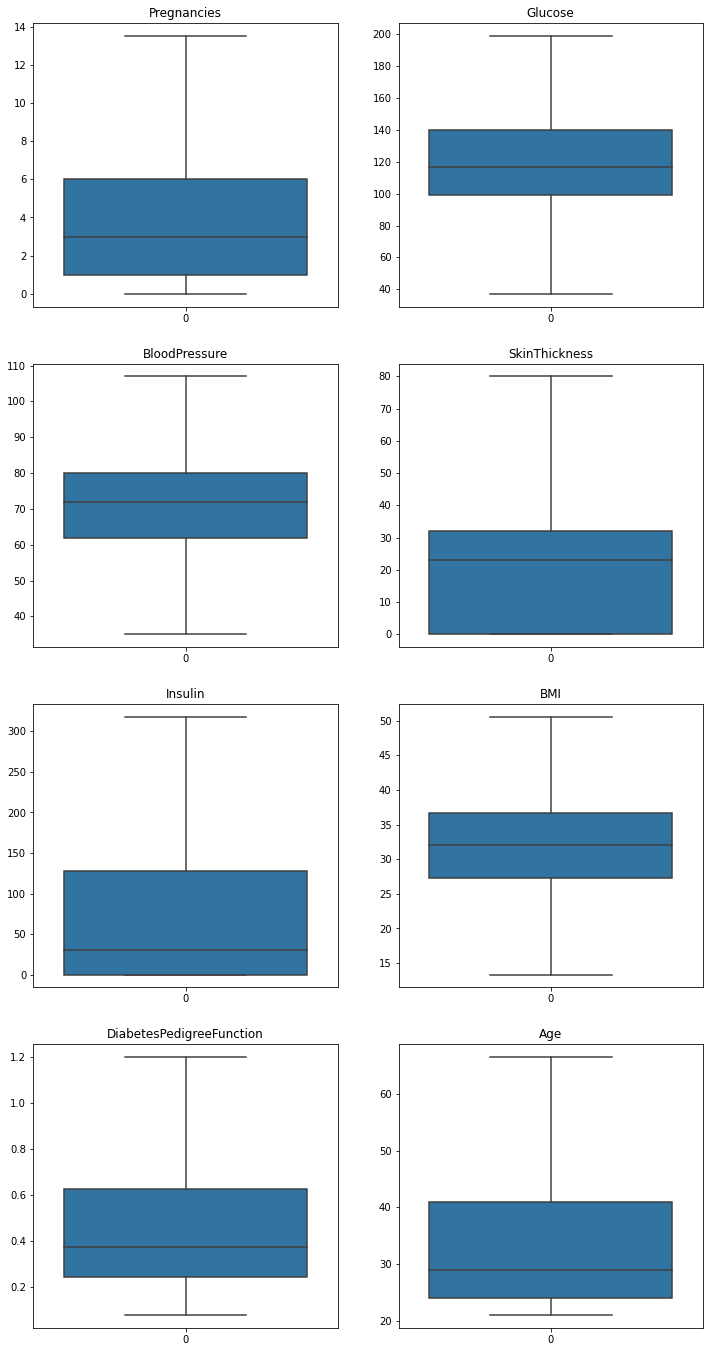

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(X_trim.columns)
num_rows = (num_columns + 1) // 2  

plt.figure(figsize=(12, 6 * num_rows))  

for i, column in enumerate(X_trim.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(data=X_trim[column])
    plt.title(column)

plt.show()

In [24]:
X_trim.shape

(768, 8)

# Standarization

In [25]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(df.drop(['Outcome'], axis=1)))

In [27]:
x.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Model Build K-nearest neighbor (KNN)

In [28]:
from sklearn.model_selection import train_test_split

X_trim_train , X_test , Y_train ,Y_test = train_test_split(X_trim,Y,test_size = 0.2,random_state=42)

X_trim_train.shape , X_test.shape

((614, 8), (154, 8))

In [29]:
from sklearn.neighbors import KNeighborsClassifier

test_score = []
train_score = []

for i in range(1,15):
    
    knn =  KNeighborsClassifier(i)
    knn.fit(X_trim_train,Y_train)
    
    train_score.append(knn.score(X_trim_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))

In [30]:
train_score

[1.0,
 0.8355048859934854,
 0.8599348534201955,
 0.8192182410423453,
 0.8061889250814332,
 0.7931596091205212,
 0.8013029315960912,
 0.7752442996742671,
 0.7931596091205212,
 0.7882736156351792,
 0.7882736156351792,
 0.7817589576547231,
 0.7882736156351792,
 0.7915309446254072]

In [31]:
test_score

[0.6623376623376623,
 0.6883116883116883,
 0.6558441558441559,
 0.7207792207792207,
 0.6688311688311688,
 0.7207792207792207,
 0.6688311688311688,
 0.7272727272727273,
 0.7272727272727273,
 0.7662337662337663,
 0.7402597402597403,
 0.7987012987012987,
 0.7792207792207793,
 0.7727272727272727]

In [32]:
max_train_score = max(train_score)
train_score_ind = [i for i ,v in enumerate(train_score) if v == max_train_score]
print("Max train score {} % and K = {}".format(max_train_score*100,list(map(lambda x:x+1,train_score_ind))))

Max train score 100.0 % and K = [1]


In [33]:
max_test_score = max(test_score)
test_score_ind = [i for i ,v in enumerate(test_score) if v == max_test_score]
print("Max train score {} % and K = {}".format(max_test_score*100,list(map(lambda x:x+1,test_score_ind))))

Max train score 79.87012987012987 % and K = [12]


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


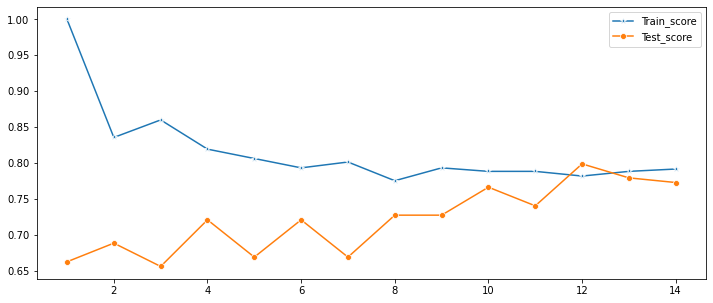

In [34]:
plt.figure(figsize= (12,5))
p=sns.lineplot(range(1,15),train_score,marker='*',label = 'Train_score')
p=sns.lineplot(range(1,15),test_score,marker='o',label = 'Test_score')

In [35]:
knn = KNeighborsClassifier(12)
knn.fit(X_trim_train,Y_train)
knn.score(X_test,Y_test)

0.7987012987012987

# Confusion Matrix

Text(0.5, 15.0, 'Predicted Label')

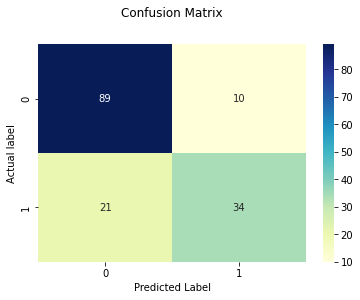

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')

In [37]:
#classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

